In [5]:
import numpy as np
from matplotlib import pyplot as plt 
%matplotlib inline

In [6]:
t_4, s1_4, s2_4, s3_4, s4_4 = np.loadtxt("count.csv", skiprows=1, usecols=(0,1,2,3,4), unpack=True, delimiter=",")
t_1, s1_1, s2_1, s3_1, s4_1 = np.loadtxt("../1HealthyServer/count.csv", skiprows=1, usecols=(0,1,2,3,4), unpack=True, delimiter=",")
t_2, s1_2, s2_2, s3_2, s4_2 = np.loadtxt("../2HealthyServers/count.csv", skiprows=1, usecols=(0,1,2,3,4), unpack=True, delimiter=",")
t_3, s1_3, s2_3, s3_3, s4_3 = np.loadtxt("../3HealthyServers/count.csv", skiprows=1, usecols=(0,1,2,3,4), unpack=True, delimiter=",")

In [83]:
size, otklik1 = np.loadtxt("../1HealthyServer/file", skiprows=1, usecols=(4,2), unpack=True, delimiter=",")
otklik2 = np.loadtxt("../2HealthyServers/file", skiprows=1, usecols=(2), unpack=True, delimiter=",")
otklik3 = np.loadtxt("../3HealthyServers/file", skiprows=1, usecols=(2), unpack=True, delimiter=",")
otklik4 = np.loadtxt("file", skiprows=1, usecols=(2), unpack=True, delimiter=",")

In [35]:
def cpu(t, s1, s2, s3, s4, title):
    f, axarr = plt.subplots(2, 2, figsize=(15,7), sharex=True, sharey=True)
    
    axarr[0, 0].plot(t, 256*s1, color='royalblue', linewidth=3, label="Server 1")
    axarr[0, 0].legend()
    axarr[0, 0].grid(b=1)

    axarr[0, 1].plot(t, 256*s2, color='mediumblue', linewidth=3, label="Server 2")
    axarr[0, 1].legend()
    axarr[0, 1].grid()

    axarr[1, 0].plot(t, 256*s3, color='purple', linewidth=3, label="Server 3")
    axarr[1, 0].legend()
    axarr[1, 0].grid()

    axarr[1, 1].plot(t, 256*s4, color='darkcyan', linewidth=3, label="Server 4")
    axarr[1, 1].legend()
    axarr[1, 1].grid()

    plt.suptitle(title)
    # Fine-tune figure; hide x ticks for top plots and y ticks for right plots
    plt.setp([a.get_xticklabels() for a in axarr[0, :]], visible=False)
    plt.setp([a.get_yticklabels() for a in axarr[:, 1]], visible=False)

    for ax in axarr.flat:
        ax.set(xlabel='Время, с', ylabel='Кол-во пакетов в сек., шт')
    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for ax in axarr.flat:
        ax.label_outer()

    plt.show()

In [81]:
def load_hist(size):
    plt.figure(figsize=(15,7))
    bins = np.linspace(size.min(), size.max(), 101)
    plt.hist(size,
                         bins=bins,
                         normed=False,
                         alpha=0.5,
                         color='b',
                         histtype='stepfilled',
                         linewidth=2,
            )

    plt.title("Нагрузка на сервер", size=20)
    plt.xlabel("Размер файла", size=20)
    plt.grid(b=1)
    plt.show()

In [97]:
def otklik_hist(otklik1, otklik2, otklik3, otklik4):
    
    min_val = min(1000*otklik1.min(), 1000*otklik2.min(), 1000*otklik3.min(), 1000*otklik4.min())
    max_val = max(1000*otklik1.max(), 1000*otklik2.max(), 1000*otklik3.max(), 1000*otklik4.max())
    
    plt.figure(figsize=(15,7))
    bins = np.linspace(min_val, max_val, 101)
    plt.hist(1000*otklik1, bins=bins, normed=False, alpha=0.5, color='b', histtype='stepfilled', linewidth=2, label='1 server')
    plt.hist(1000*otklik2, bins=bins, normed=False, alpha=0.5, color='r', histtype='stepfilled', linewidth=2, label='2 servers')
    plt.hist(1000*otklik3, bins=bins, normed=False, alpha=0.5, color='y', histtype='stepfilled', linewidth=2, label='3 servers')
    plt.hist(1000*otklik4, bins=bins, normed=False, alpha=0.5, color='g', histtype='stepfilled', linewidth=2, label='4 servers')

    plt.title("Время отклика при разном кол-ве работающих серверов ", size=20)
    plt.xlabel("Время отклика, мс", size=20)
    plt.legend(loc='best', prop={'size':15})
    plt.grid(b=1)
    plt.show()

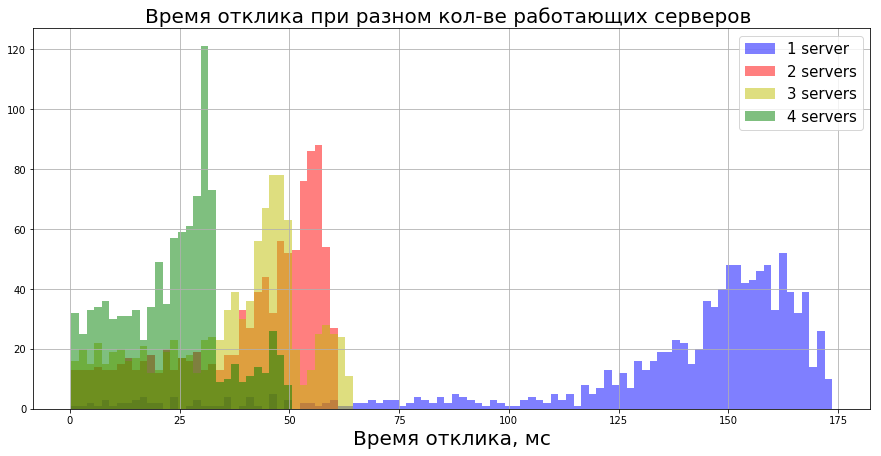

In [98]:
otklik_hist(otklik1, otklik2, otklik3, otklik4)

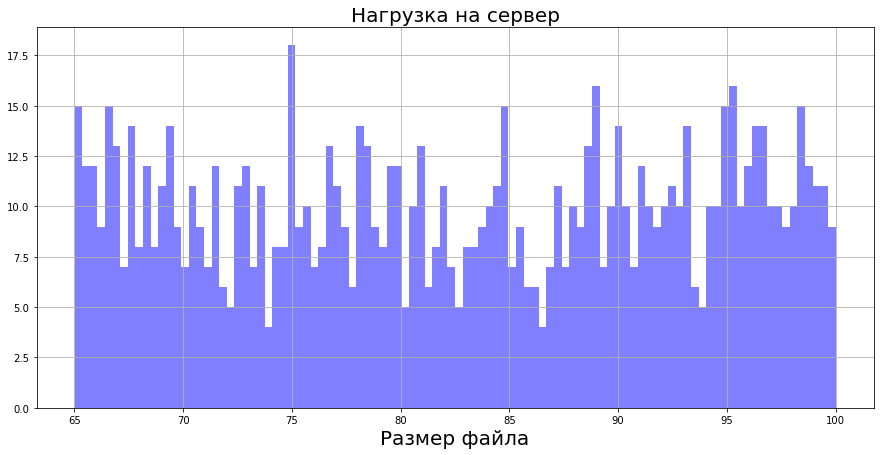

In [82]:
load_hist(size)

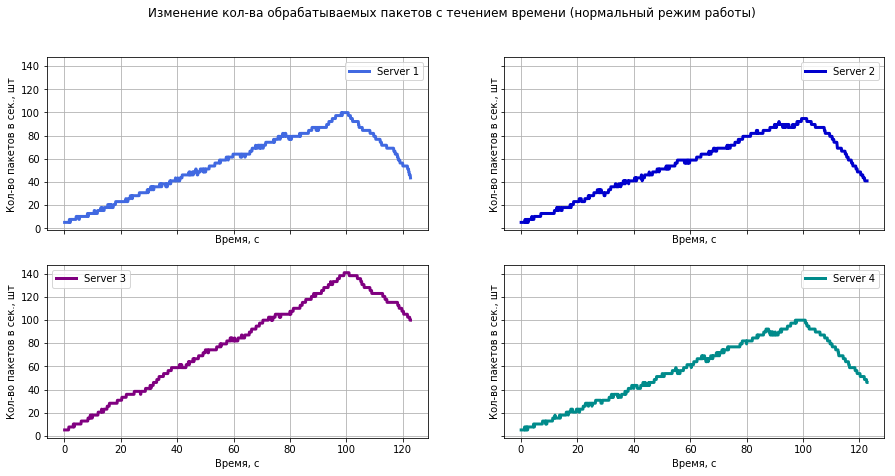

In [36]:
cpu(t_4, s1_4, s2_4, s3_4, s4_4, "Изменение кол-ва обрабатываемых пакетов с течением времени (нормальный режим работы)")

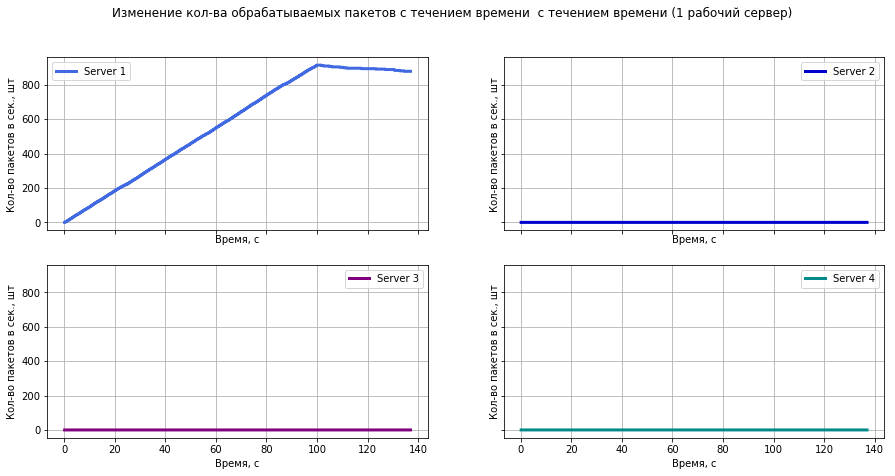

In [37]:
cpu(t_1, s1_1, s2_1, s3_1, s4_1, "Изменение кол-ва обрабатываемых пакетов с течением времени  с течением времени (1 рабочий сервер)")

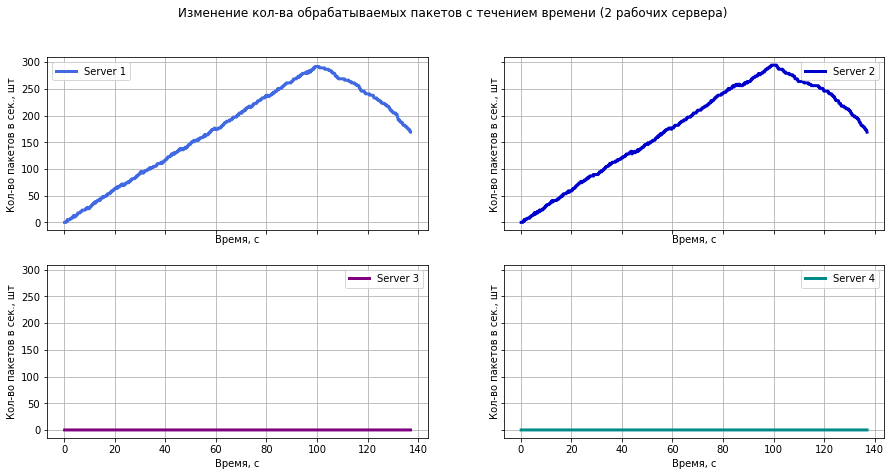

In [41]:
cpu(t_2, s1_2, s2_2, s3_2, s4_2, "Изменение кол-ва обрабатываемых пакетов с течением времени (2 рабочих сервера)")

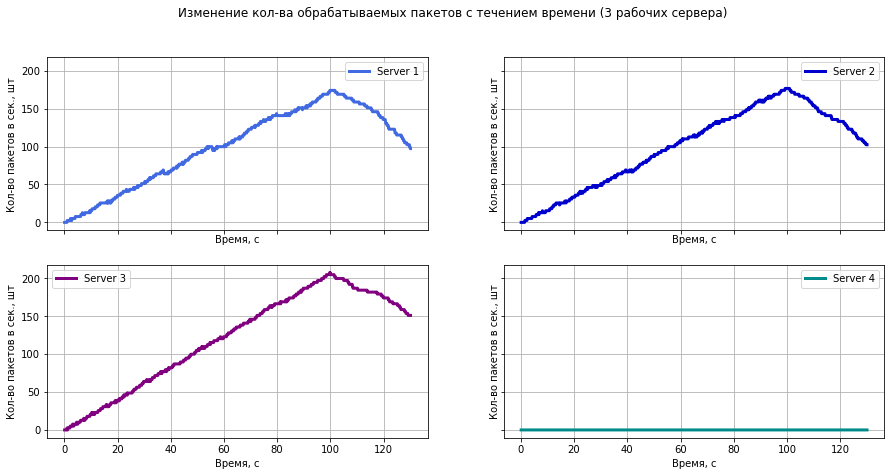

In [39]:
cpu(t_3, s1_3, s2_3, s3_3, s4_3, "Изменение кол-ва обрабатываемых пакетов с течением времени (3 рабочих сервера)")